### Problem Statement: 
You work in a startup that develops photo editing features for third party apps. You are assigned with a task of creating an editing feature that implements different art styles on people’s faces.

### Objective: 
To perform neural style transfer using PyTorch.

### Import the necessary library

In [0]:
!pip install torch

     |████████████████████████████████| 753.4MB 6.0kB/s  eta 0:00:01     |██████▊                         | 159.5MB 46.4MB/s eta 0:00:13     |████████                        | 187.9MB 46.4MB/s eta 0:00:13     |██████████████▍                 | 338.4MB 62.7MB/s eta 0:00:07


In [0]:
!pip install torchvision

     |████████████████████████████████| 4.0MB 3.1MB/s eta 0:00:01


In [0]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

### Check if CUDA is available

In [0]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

### Load a Vgg-19 model

In [0]:
model = models.vgg19(pretrained=True).features
for p in model.parameters():
    p.requires_grad = False
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/ubuntu/.cache/torch/checkpoints/vgg19-dcbb9e9d.pth
100.0%


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

### Choose layers for style loss and content loss

In [0]:
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name,layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x 
    
    return features

### Transform the images

In [0]:
transform = transforms.Compose([transforms.Resize(300),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]) #using 0.5,0.5,0.5) for both mean and sd

In [0]:
content = Image.open("content.jpg").convert("RGB")
content = transform(content).to(device)
print("Content shape => ", content.shape)
style = Image.open("style.jpg").convert("RGB")
style = transform(style).to(device)

COntent shape =>  torch.Size([3, 300, 427])


### Function to convert the image

In [0]:
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    x = np.clip(x, 0.0, 1.0)

    return x

### Print the image

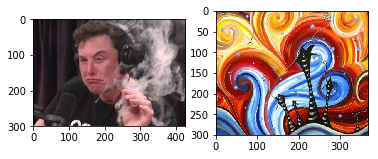

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()

In [0]:
def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat

In [0]:
target = content.clone().requires_grad_(True).to(device)

#set device to cuda if available
print("device = ",device)

device =  cuda


In [0]:
style_features = model_activations(style,model)
content_features = model_activations(content,model)

style_wt_meas = {"conv1_1" : 1.0, 
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

epoch  10   tensor(1.0345e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  20   tensor(5.6007e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  30   tensor(3.8286e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  40   tensor(3.0395e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  50   tensor(2.6341e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  60   tensor(2.3458e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  70   tensor(2.1378e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  80   tensor(1.9631e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  90   tensor(1.7957e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  100   tensor(1.6266e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  110   tensor(1.4549e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  120   tensor(1.2845e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  130   tensor(1.1223e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  140   tensor(9.7534e+17, device='cuda:0', grad_fn=<Ad

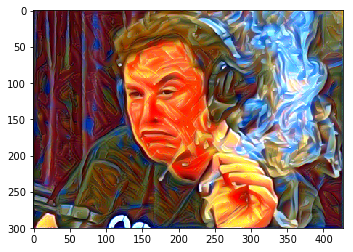

epoch  510   tensor(1.9160e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  520   tensor(1.8783e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  530   tensor(1.8422e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  540   tensor(1.8075e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  550   tensor(1.7741e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  560   tensor(1.7421e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  570   tensor(1.7112e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  580   tensor(1.6816e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  590   tensor(1.6531e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  600   tensor(1.6256e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  610   tensor(1.5992e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  620   tensor(1.5738e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  630   tensor(1.5493e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  640   tensor(1.5257e+17, device='cuda:0', gr

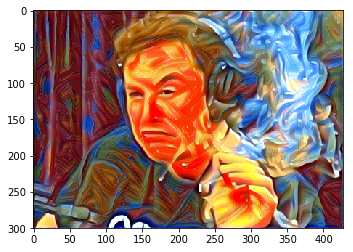

epoch  1010   tensor(1.0161e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1020   tensor(1.0081e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1030   tensor(1.0004e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1040   tensor(9.9282e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1050   tensor(9.8542e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1060   tensor(9.7818e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1070   tensor(9.7111e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1080   tensor(9.6419e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1090   tensor(9.5742e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1100   tensor(9.5079e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1110   tensor(9.4429e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1120   tensor(9.3793e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1130   tensor(9.3169e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1140   tensor(9.2558e+16, devic

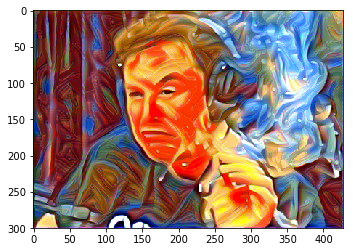

epoch  1510   tensor(7.6468e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1520   tensor(7.6158e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1530   tensor(7.5853e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1540   tensor(7.5553e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1550   tensor(7.5257e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1560   tensor(7.4965e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1570   tensor(7.4677e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1580   tensor(7.4393e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1590   tensor(7.4112e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1600   tensor(7.3835e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1610   tensor(7.3562e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1620   tensor(7.3292e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1630   tensor(7.3027e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1640   tensor(7.2765e+16, devic

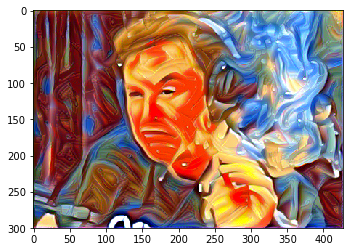

In [0]:
content_wt = 100
style_wt = 1e8

print_after = 500
epochs = 2000
optimizer = torch.optim.Adam([target],lr=0.007)

for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h
    
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        plt.imsave(str(i)+'.png',imcnvt(target),format='png')